## In this Notebook I am going to impliment the **Handle the Missing Values** Pediction.

### Ways to Handle Missing values 

 1- **Deleting Rows** with missing values.

 2- Impute missing values with **Mean/Median/Mode**.

 3- **Prediction** of missing values.

### Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"F:\Downloads\loan.csv"
df = pd.read_csv(path)

# Lets make copies of data for apply diffrent types of handling missing values.

df_delete_rows = df.copy() # In this I will fill values with mean.
df_Mean_Median_Mode = df.copy() # In this I will fill values with median.
df_Prediction = df.copy() # In this I will fill values with mode.

## Methode 2 - Mean/Median/Mode

In [3]:
df_Mean_Median_Mode.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [4]:
df_Mean_Median_Mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
 12  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [5]:
df_Mean_Median_Mode.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

### Here, In this dataset null values are present in 6 columns - 

#### [**Gender**, **Dependents**, **Self_Employed**, **LoanAmount**, **Loan_Amount_Term**, **Credit_History**]

### **Visualize** Our Dataset For Better Understanding

<AxesSubplot:title={'center':'Heat Map for Missing Values'}>

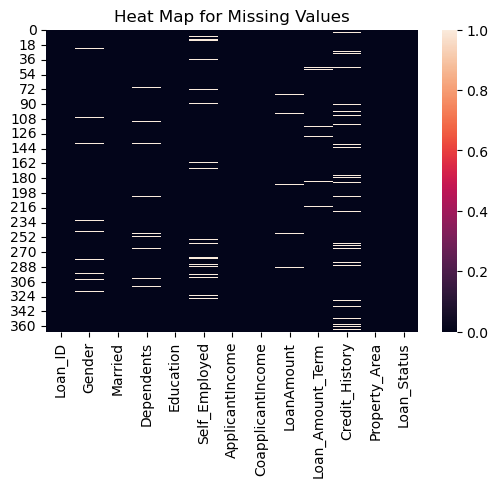

In [6]:
plt.figure(figsize=(6,4), dpi=100)
plt.title("Heat Map for Missing Values")
sns.heatmap(df_Mean_Median_Mode.isna())

### Now I am Handling missing values to **Fill Mean/Median/Mode** that rows

Note > 
  - Due to this methode **Missing Values** will be filled with Mean/Median/Mode.
  - From using this methode Posibily of **Important Data Loss** is Low compare to **Delete** that rows.
  - Our Data also will clean.


In [7]:
def fill_nan(df_Mean_Median_Mode):
    df_Mean_Median_Mode['Gender'] = df_Mean_Median_Mode['Gender'].fillna(df_Mean_Median_Mode['Gender'].mode()[0])
    df_Mean_Median_Mode['Dependents'] = df_Mean_Median_Mode['Dependents'].fillna(df_Mean_Median_Mode['Dependents'].mode()[0])
    df_Mean_Median_Mode['Self_Employed'] = df_Mean_Median_Mode['Self_Employed'].fillna(df_Mean_Median_Mode['Self_Employed'].mode()[0])
    df_Mean_Median_Mode['Credit_History'] = df_Mean_Median_Mode['Credit_History'].fillna(df_Mean_Median_Mode['Credit_History'].median())
    df_Mean_Median_Mode['LoanAmount'] = df_Mean_Median_Mode['LoanAmount'].fillna(df_Mean_Median_Mode['LoanAmount'].mean())
    df_Mean_Median_Mode['Loan_Amount_Term'] = df_Mean_Median_Mode['Loan_Amount_Term'].fillna(df_Mean_Median_Mode['Loan_Amount_Term'].mean())
    
    return df_Mean_Median_Mode


In [8]:
df_Mean_Median_Mode = fill_nan(df_Mean_Median_Mode)

In [9]:
df_Mean_Median_Mode.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:title={'center':'Heat Map for Missing Values'}>

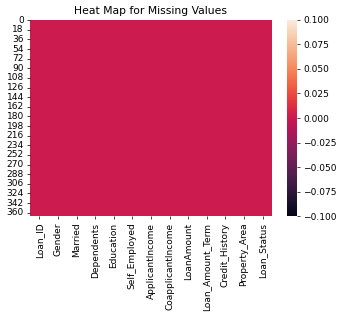

In [10]:
plt.figure(figsize=(6,4), dpi=65)
plt.title("Heat Map for Missing Values")
sns.heatmap(df_Mean_Median_Mode.isna())

# Now My Dataset has no *Null Values*.

## Observations :-

                   Missing Values
    Gender               11
    Dependents           10
    Self_Employed        23
    LoanAmount            5
    Loan_Amount_Term      6
    Credit_History       29
   
**These was the columns those had missing values.**

   1- From Dataset **Gender, Dependents, Self_Employed** was object type. So i decided to fill **Mode**.
   
   2- From Dataset **Loan_Amount, Loan_Amount_Term, Credit_History** was float type.
        
   3- In **Credit_History** column values was **Catagorical**. So i fill those from **Median**.
   
   4- Else i filled with **Mean**
